# Projet 6:Detecter  des faux  billets

En tant que data analyste  , nous sommes employés au ministere de  l'inteireur  pour  lutter  contre  la fraude  aux faux  billets. A ce titre , nous sommes chargés  de creer  un algorithme  capable  de  detecter  les faux  billets  en  nus  basant  sur  les caracteristiques geometriques des billets et grace  à une  modelisation type  regression logistique.
Pour reussir cette  mission , nous  menerons differentes  actions de reduction de dimensionnalité d'ehantillon , ensuite  nous  nous aiderons du kmeans pour  diviser  nos groupes  pour enfin  predire   l'authenticité du  billet avec  l'apport  du machine  learning.

De  primme abord ,nous  importons les données  afin de  proceder  aux traitements de  celles-ci.


# Importation des données du  projet
Mais avant  importons  les  librairies et modules  requis  pour  la data analyse  

In [68]:
#Importation des  modules et librairies  pour  la data science 
import pandas as  pd
import  numpy as  np
import matplotlib.pyplot as  plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from functions import * 
import scipy.stats as st
from scipy.stats import ks_2samp
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import statsmodels.formula.api as smf
import statsmodels.api as sm

#Une fois  les  modules  chargés  nous allons  charger  les données  avec  panadas

In [69]:
#Importons  notre  jeu de données
df= pd.read_csv('fbp6.csv')
df.info()
df.head()

# un premier apercu nous indique  le  nombre de  lignes et de colonns de  notre table  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


Notre dataset  est  composée de variables  booleenne et  variable  numeriques de type   quatntitave  continue.La hauteur  , la marge  et  la diagonale des  billets y sont decrites avec  une varible booleenne  consideree aussi  comme variable qualitative discrete indiquant   l'authenticité du  billet .
A present  faisons  une  premiere statistique  basique sur  cette  table  

# Mission 0
Une  premeire analyse  univariée et  bivariée  pour  comprendre  le data set  

In [3]:
#Petite statistique basique 
df.describe(include='all')

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,170,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,100,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,NaN,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,NaN,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,NaN,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,NaN,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,NaN,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500


Avec  la methode describe  ,  on  peut observer quelques statistiques de base Sur  les valeurs  max et min  des variables et  leur  frequence. A  priori  il n' y a pas de données manaquantes de type NaN . Aussi  ,  on  peut constater  que  la var  booleenne contient   2 valeurs differentes de true et  false  pour qualifier  les  billets  .

# Analyse  univariée et  bivariée

In [4]:


#Verifions s'il y' a des anomalies  ou  des valeurs manquantes  
df.isna().sum()
# Notre datset  ne comporte pas  de valeurs Nan

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [5]:
#Verifions s'il y' a des doublons 
df.duplicated().sum()

#Ces verifications d'usage  nous  indiquent  que  notre  data set  est  propre 
#Aisni  nous  piuvons  proceder   une sattistique descripttive  

0

In [6]:
#Comptons le  nombre d'observations d'individus  dans chaque classe de  notre variable booleenne
df['is_genuine'].value_counts()

True     100
False     70
Name: is_genuine, dtype: int64

Ces  premieres statistiques  indiquent  que  nous disposons  d'une table de données nettoyées ne comportant  pas  d'irregularités  ou  d'anomalies  de type  Nan  o un valeurs aberrantes ?
Aussi  les deux classes  ne sont  pas  trop desèquilibrées quant aux  individus  les comportant.

In [7]:
#Faisons quelques alanyses  univariées
print('Moyenne :', df['length'].mean(),';Mediane :' , df['length'].median(),' ; Mode : ',df['length'].mode(),';Variance:',df['length'].var(ddof=0))

Moyenne : 112.57041176470587 ;Mediane : 112.845  ; Mode :  0    113.38
dtype: float64 ;Variance: 0.8495768892733564


Les  mesures de tendance centrale sur la variable  length  indiquent  une  moyenne et  une mediane  autour de  la valeur  112 en dessous  du mode de cette distribution  .

<AxesSubplot:title={'center':'Longueur des billets.jpg '}, xlabel='length', ylabel='Count'>

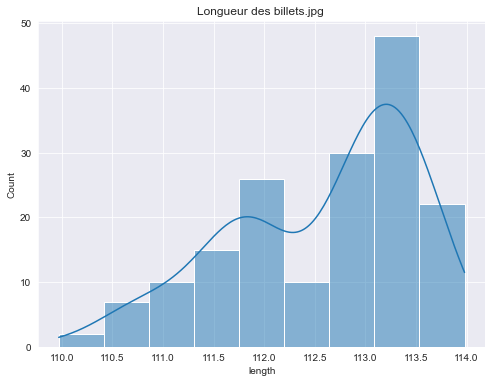

In [8]:
#Affichons  un histogramme de  la variable  length 
plt.figure(figsize=(8,6))
plt.title('Longueur des billets.jpg ')
plt.savefig('representation  longeueur des billets.jpg')
sns.histplot(data=df,x='length',kde=True)

#La distribution de  la longueur de  billet  n'a pas  une forme de  loi gaussienne . On   onbserve  une  mode  se situant autour  
#de 113 

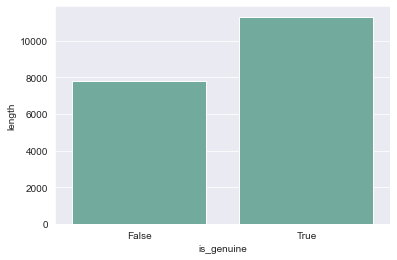

In [9]:
#Representons  la  distribution  de  la variable  illustrative
# plot a bar chart
sns.barplot(
    x="is_genuine", 
    y="length", 
    data=df, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

<AxesSubplot:title={'center':'marge bas des billets.jpg '}, xlabel='margin_low', ylabel='Count'>

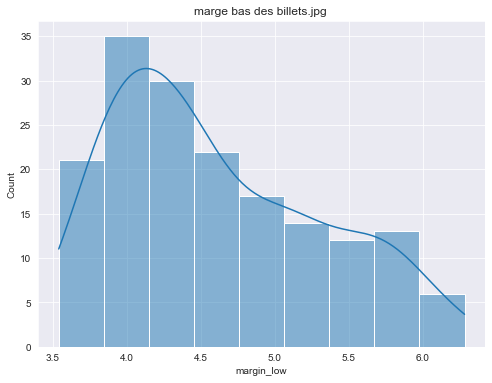

In [10]:
#Affichons  un histogramme de  la variable  margin low 
plt.figure(figsize=(8,6))
plt.title('marge bas des billets.jpg ')
plt.savefig('representation  marge bas des billets.jpg')
sns.histplot(data=df,x='margin_low',kde=True)

Cette representation de  la marge basse du  billet indique  un  mode autour de  4 mm et au dela de cette  mesure ,  on constate de  moins en  moins  d'observation.

Abordons  les analyse  bivariées  après avoir  etudier  individuelleemnt  quelques variables.

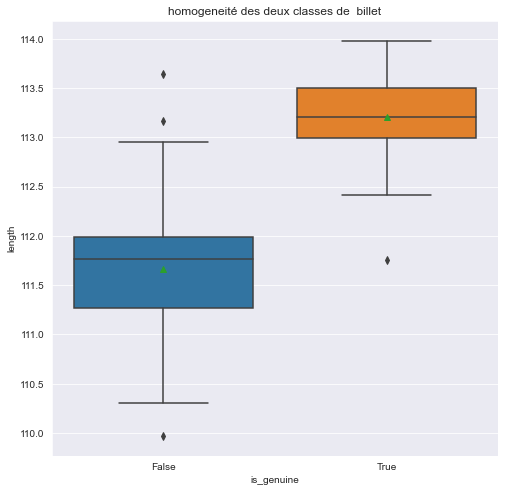

In [11]:
#Analyse bivariées pour voir  l'homoscedasticité 
plt.figure(figsize=(8,8))
plt.title('homogeneité des deux classes de  billet')
sns.boxplot(x='is_genuine',y='length',showmeans=True,data=df)
plt.savefig('boxplot des deux variables  .jpg')


Le graphe  montre  une  plus grande variance quand  le  billet est  faux .c'est  a dire  que  la  longueur  du  billet  quand  il est  faux  varie  enormement. ce qui est  comprehensible .
Globalement  ,  on  pourrait dire que  les faux billets  ont tendance  à  etre  moins  longs que  les vrais.

<AxesSubplot:>

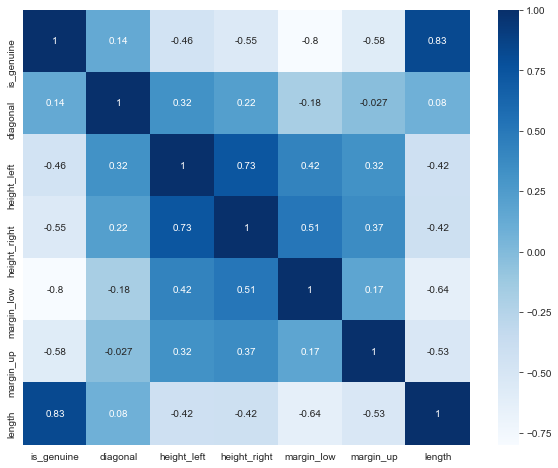

In [12]:
#la matrice de correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

Sur cette heatmap , on  peut  y voir  les correlations  positives au seuil superieur 0.5
-length , height right, is_genuine , 
Anti  correlées  au seuil de -0.5
-height right  , margin low  , margin  up , length,
Ces variables correlees  ou  anti  correlees  vons  nous  guider  à mieux  lire et decrire  notre echantillon . 
Cela  peut  nous  guider  aussi  pour  representer  des  nuages de  points  .

<Figure size 864x864 with 0 Axes>

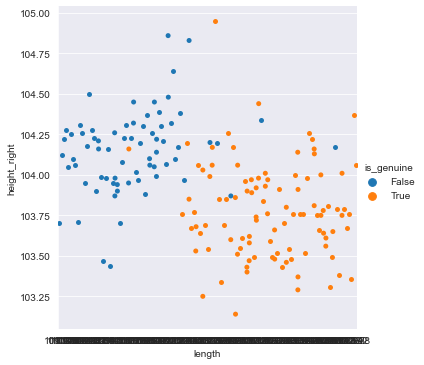

In [13]:
#Representons quelques  nuages de  points sur  la  base  de  notre  matrice de corelation  
#Voyons  le lien entre  la  longeuur  du  billet  et la hauteur droite de celui-ci  
plt.figure(figsize=(12,12))
sns.catplot(x='length',y='height_right',data= df,hue='is_genuine')
plt.savefig('graphique sur  la qualite du  billet selon  longueur et  hauteur.jpg')

Ce graphique  indique  la longeur du  billet  en  lien avec sa hauteur  de droite  selon  qu'il soit vrai  ou faux .les vrais  billets sont generalement  plus  longs que les faux   mais  la hauteur de droite des faux  billets  depassent   en  moyenne ceux  des vrais  billets .  On  peut  voir  deux  groupes  distincts  de  faux  et  vrais  billets   avec  les deux couleurs .


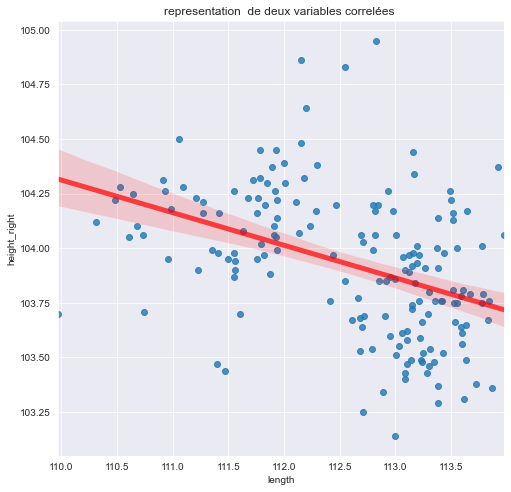

In [14]:
#faisons  un regplot  pour  y afficher  la droite de regresseion
#Entre  les deux varibles quantitatives  continues  
plt.figure(figsize=(8,8))
sns.regplot(x=df["length"], y=df["height_right"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title('representation  de deux variables correlées ')
plt.savefig('correlation  lineaire  entre  les variables  hauteur de droite  et  longueir de  billets .jpg')
plt.show()

On  voit  bien  sur ce  graphe  les deux variables  et  une  relation lineaire s'entrevoit. cependant  il y'a  une forte disparite autour de  la droite de regression


# Conclusion mission 0

Nous retenons  pour cette  mission  que  la statistique descriptive   a permis  de  montrer   quelques  liens entre certaines variables . Nous retenons aussi  que  la variable clé est   la variable  booleene  qui  indique  la qualité du  billet. Cette variable  se trouve etre correlée   à  la  longueur du  billet  ,  à la hauteur et  aux marges . Selon la statistique descriptive  ,  la qualité du  billet est  sensible  à  une certaine dimension de  sa longueur .

# Mission 1 :  Analyse en composante  principales 

Cette analyse va nous aider  à  reduire  la dimensionnalité de  notre echantillon de sorte  à mieux  etre  informée .

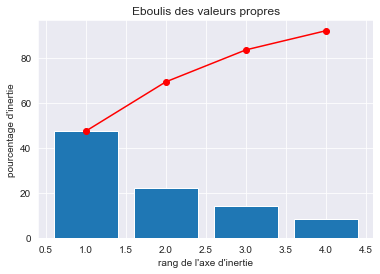

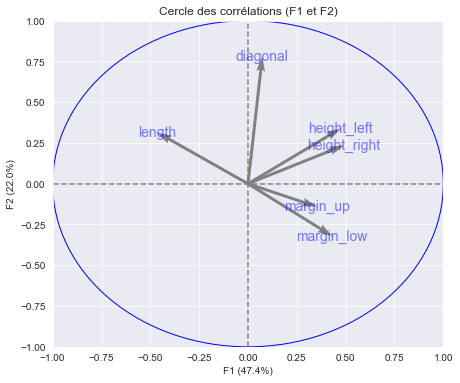

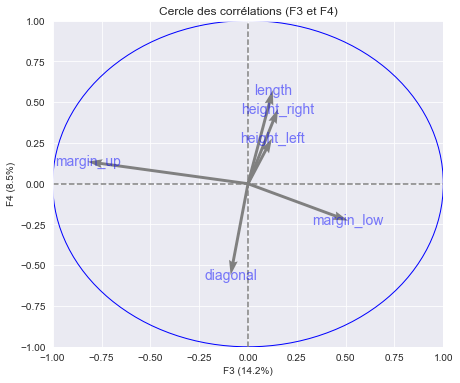

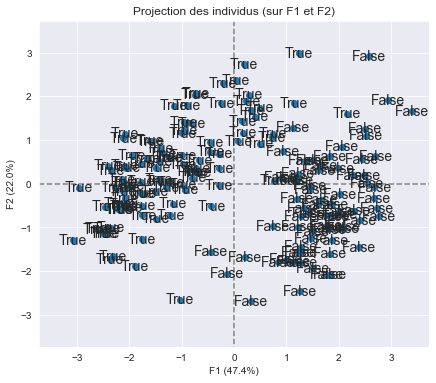

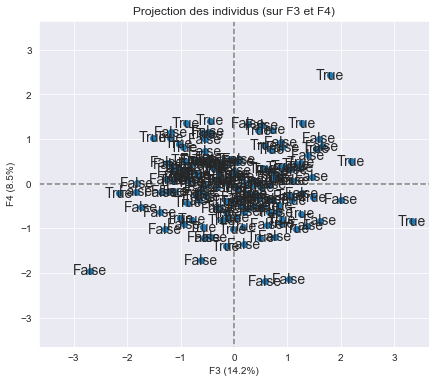

<Figure size 720x720 with 0 Axes>

In [15]:
#Nous allons  à travers  l'ACP afficher  les cercles de correlation  et la  projection des  individus
# choix du nombre de composantes à calculer
n_comp = 4

#Selection des données  à prendre en compte  pour  l'ACP
X = df[['diagonal','height_left','height_right','margin_low','margin_up','length']].values
names = df['is_genuine'].to_numpy()

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca =decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
features = ['diagonal','height_left','height_right','margin_low','margin_up','length']
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', 
rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)


# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))
plt.figure(figsize=(10,10))
plt.savefig('ACP de notre echantillon1.jpg')
plt.show()



# Interpretation ACP

L'acp indique  une eboullie des valeurs   dans  laquelle  le  premier  plan factoriel occupe 70% des  informations  . cela  equivaut  à  70% de variance d'inertie du premier  plan factoriel  constitué de F1 et F2 .Cela signifie  que  70%  des  informations sur  notre echantillon sont  fournies  par  les 2 premieres dimensions ou axes .
Les autres axes occupent  les 30% d'informations restants.
-Cercle de correlation :  Sur  le  premier  plan factoriel  ,  les variables  hauteurs et  marges sont  positivement correlées  à  F1 quand  la var diagonal  est  fortement correlee  à  F2. La var  length  est  negativement correlée  à  F1.
Notons que  les variables  hauteurs et  marges sont  mal representées  en regard  à la longueur  de  leur rayons.
-Sur  le graphe des  individus  , on  projette  la var  illustrative  pour voir  les barycentrees des  modalités  de  is_genuine (True/False) 
Sur  le deuxieme  plan factoriel  ,  les variables  de  marges sont  correlees et  anti correlees  à  F3 quand  diagonale demeure correlée (anti)   à  F4.Les autres variables  sous representées  sont corréléés  positivement  à  F4.

-Sur le graphe des individus  : nous  voyons les deux  modalités  prises  par  la var  illustrative d'authenticité de  billet . Une forme  de  regroupement des modalités est  visible de sorte que  les  modalités   true et  false qui  ne se melangent pas.
Nous  y voyons sur  le premier  factoriel une forme de deux  nuages d'individus  formant chacun  un grooupe autour duquel gravitent quelques  individus .


#Contribution des variables  
#Plus  les vecteurs les angles et l'axe est faible  ,  plus la variable contrinbue a cet axe
#Conntribution positive  

In [41]:
print(pca.explained_variance_ratio_)

[0.47447921 0.21957106]


#variance expliquee  : la qualité de la representativité  , mesure entre x et  y  ,
le 1 er axe represente  acapare 47  %  de  l' infos   et 21 % comme  l'atteste  l'eboulie des valeurs  propres.

# Mission 2: algorithme de classification K-means

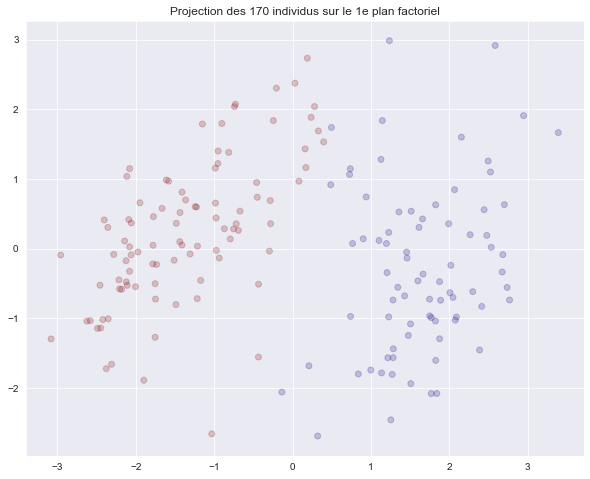

In [16]:
#Nombre de clusters demande  = 2
n_clust = 2
#Selection des données  à prendre en compte  pour  l'ACP
X = df[['diagonal','height_left','height_right','margin_low','margin_up','length']].values
names = df['is_genuine'].to_numpy()

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=2).fit(X_scaled)
X_projected = pca.transform(X_scaled)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X_projected)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_


plt.figure(figsize=(10,8))
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.savefig('projection des  individus sur  le  premier  plan factoriel.jpg')
plt.show(block=False)



Ce graphe  montre un nuage de  points  regroupés en  deux  clusters  principaux . Les points bleux representent   les faux  billets  et  l'autre couleur  les  bons billets  .
On apercoit bien  une grande  variance  inter-cclasse et  une variance  intra-classe petite.

# Calcul des centroides  et  caracterisation 

In [17]:
#Affichons  les  moyennes  des variables du  cluster V
#cela va representer  le calcul des centroides ou centres de classe du  cluster
#Ensuite , nous caracteriserons le cluster selon ces valeurs moyennes
clusterV= df.loc[df['is_genuine']==True]
clusterV.mean()

#Ce groupe represente  les dimensions moyennes d'un vrai billet

is_genuine        1.0000
diagonal        171.9761
height_left     103.9515
height_right    103.7759
margin_low        4.1435
margin_up         3.0555
length          113.2072
dtype: float64

In [18]:

#Trouvons  pour  le groupe des faux billets
clusterF = df.loc[df['is_genuine'] ==False]
clusterF.mean()

#Ce groupe represente  les dimmensions  moyennes  d'un faux  billet

is_genuine        0.000000
diagonal        171.889857
height_left     104.230429
height_right    104.145571
margin_low        5.281571
margin_up         3.334571
length          111.660714
dtype: float64

# Table des centroides  

Nous allons regrouper ces centroides dans  une seule table

In [19]:
#Regroupement de  la table autour de cluster 
#Cela nous  permettra d'avoir  une table grouppée autour de la cle cluster et de  pouvoir  
#Faire des operations dessus comme la moyenne 
cluster_gr = df.groupby(by='is_genuine').agg(['mean']).reset_index()
cluster_gr.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
,,mean,mean,mean,mean,mean,mean
0,False,171.889857,104.230429,104.145571,5.281571,3.334571,111.660714
1,True,171.976100,103.951500,103.775900,4.143500,3.055500,113.207200


# # Mission 3

# Regression  logistique avec statsmodel

Nous allons effectuer une regression  logistique afin de  predire  l'authenticité du  billet  en  nous basant sur  la variable expliquée  is_genuine et  les autres variables explicatives independantes de notre echantillon.
Mais avant changeons   la variable  expliquée en remplacant  par  1  et 0  les modalites  prises  par cette farible  
Nous allons  par  le  bien d'un dictionnaire  remplacer  les modalutés vraie et  faux  


Avant  de  proceder  à la regression  logistique , nous creons  les variables X et y qui  vont servir  à notre  modelisation 

In [20]:
X_reg= df[['diagonal','height_left','height_right','margin_low','margin_up','length']]
y_reg = df['is_genuine']# creztion de la matrice de variable dependante

In [21]:
#Affichons ces variables  Sommairement 
print(X_reg.head())
print(y_reg.head())

   diagonal  height_left  height_right  margin_low  margin_up  length
0    171.81       104.86        104.95        4.52       2.89  112.83
1    171.67       103.74        103.70        4.01       2.87  113.29
2    171.83       103.76        103.76        4.40       2.88  113.84
3    171.80       103.78        103.65        3.73       3.12  113.63
4    172.05       103.70        103.75        5.04       2.27  113.55
0    True
1    True
2    True
3    True
4    True
Name: is_genuine, dtype: bool


Avant  d'appliquer  la regression  à  notre  table entiere  , nous testons avec  une variable  celle de  la  longueur. En effet , elle etait  bien correlée  à  notre variable is_genuine  quand  nous avions  lancé  la matrice des correlations.

In [22]:
reg_log = smf.glm('is_genuine~length',data=df, family=sm.families.Binomial()).fit()
print(reg_log.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                  170
Model:                                                   GLM   Df Residuals:                      168
Model Family:                                       Binomial   Df Model:                            1
Link Function:                                         logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -31.836
Date:                                       Fri, 19 Nov 2021   Deviance:                       63.672
Time:                                               11:17:34   Pearson chi2:                     371.
No. Iterations:                                            7                                         
Covariance Type:                                   nonrobust                      

On  obtient  les  paramètres estimés :𝛽̂1=549.07 et 𝛽2 = -4.9

On obtient un p valeur inferieur au seuil de test  de 5% , donc  cette variable est significative  pour  notre  modele.
Mais rajoutons  une autre variable  pour  tester   notre regression  logistique
Pour  la  problematique  metier , c'est important que  la longieur  soit significative car au dela de  l'algorithme  ,  une verification est plus aisee en comparant des  billets par  leur  longueur que  les autres  caracteristiques  (marges  ,  diagonale  ...)

In [23]:
reg_log1 = smf.glm('is_genuine~length+diagonal+margin_low',data=df, family=sm.families.Binomial()).fit()
print(reg_log1.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                  170
Model:                                                   GLM   Df Residuals:                      166
Model Family:                                       Binomial   Df Model:                            3
Link Function:                                         logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                    nan
Date:                                       Fri, 19 Nov 2021   Deviance:                          nan
Time:                                               11:17:34   Pearson chi2:                     8.89
No. Iterations:                                          100                                         
Covariance Type:                                   nonrobust                      

/Users/jamaltraore/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/jamaltraore/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:946: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/Users/jamaltraore/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:947: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
/Users/jamaltraore/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:945: RuntimeWarning: invalid value encountered in add
  return (special.gammaln(n + 1) - special.gammaln(y + 1) -



On  obtient  un  p-valeur  superieur  au seuil du  test de 5% . Ainsi  on conclut que ces deux autres  variables   ne sont pas   significatives. 
Nous ne testerons  pas  les autres variables  independantes du  fait que  la matrice de correlation  ne  nous  indiquait  pas  une correlation d'avec  notre variable  illustrative.Aussi le cercle de correlation  indiquait  une sous-representation de ces variables. ce qui  nous emmene  à negliger  ces variables  pour  la suite de  notre  modelisation .

#Bilan  
La regression  logistique avec statsmodel permet  de comprendre  la significativité des variables independantes  pour creer  un  model  . Mais  il  nous semble  insuffisant  pour  predire et mettre en place  un  modele sous forme  de  machine  learning.
Ainsi  , avons-nous decidé de tester  le  module de  machine  learning  par essence de  python qu'est  sklearn.

# Regression logistique  avec  scikit learn  

# #Creation du modele 

In [24]:
#Appliquons  la  fonction de regression  logistique sur  les deux variables 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
#Nous creons le modele  avec et l' affectons  à cette variable  model  et affectons la fonction logistique 
#Avant tout  , nous scindons en deux  notre  table 

# Scission du dataset

# jeu de donnée d'entrainement et de test 

In [25]:
# Diviser le dataset entre le Training set et le Test set
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size = 0.20, random_state = 0)



Nous creeons  deux  bases de données  de train et de test  , une qui fait  l'apprentissage et  l'autre qui fait  la  prediction avec  la fonction  train test split 
Nous  paremetrons  de facon 80% et 20% et essayons  aleatoirement  avec  la valeur 0 qui est la ligne 1 de notre table d'origine 
Pour verifier  nous affichons  les dimensions de ces deux tables


In [26]:
#Voyons  les dimensions(tailles)de nos variables
print(X_reg_train.shape)
print(X_reg_test.shape)
#Nous remarquons  que  la table est constituée de 80 et 20 % effectivement 

(136, 6)
(34, 6)


In [66]:
#Entrainons  notre  modele  
model.fit(X_reg_train,y_reg_train)

LogisticRegression(random_state=0)

# testing  du modèle construit 

In [28]:
#Nous testons ici  notre  modèle avec  la fonction  predict
predictions = model.predict(X_reg_test)
y_reg_pred = model.predict(X_reg_test)
print(predictions)
print(y_reg_test)


[False False False  True  True False  True  True False  True False  True
  True False  True  True  True False  True  True False  True False False
 False  True  True False  True  True  True False  True  True]
133    False
136    False
168    False
54      True
56      True
144    False
7       True
96      True
121    False
97      True
141    False
5       True
83      True
109    False
55      True
18      True
61      True
101    False
60      True
63      True
153    False
4       True
106    False
161    False
108    False
37      True
66      True
157    False
45      True
26      True
33      True
125    False
44      True
8       True
Name: is_genuine, dtype: bool


Le  modele  fonctionne  parfaitement à la lecture de  l'output de  notre test , les trois  premiers  false  equivalent  aux trois  premeires valeurs .

La phase de testing se deroule  bien  car on  peut  observer  que  nos valeurs  predites en haut  correspondent aux valeurs reelles de  notre echantillon . On  remarque par exemple  que  la  premiere  observation  correspond  à la  premeir  ligne 138  =  False .

In [30]:
#Voyons le score de  notre modelisation
model.score(X_reg_test, y_reg_test)

1.0

In [31]:
#Evaluons la modelisation et la precision 
print(classification_report(y_reg_test, y_reg_pred))


              precision    recall  f1-score   support

       False       1.00      1.00      1.00        14
        True       1.00      1.00      1.00        20

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



precision sur  l'ensemble  :  accurracy  ensemble de faux  et  vrais sur  l'ensemble  , sur  les vrais aux  , faux vrai  
precision  - 

In [32]:
#Affichons  la  matrice de confusion  
cm = confusion_matrix(y_reg_test, y_reg_pred)
print(cm)

[[14  0]
 [ 0 20]]


#accuracy  =  14+20 /14+20+0+0 = 1

# Probabilité

Nous calculons et  affichons  les  probabilités que  les billets soient  faux  ou  vrais. La liste  sortie  nous indique  sur  notre  set de test  des  34 individus  le  pourcentage selon qu'il soit vrai ou  faux .  Par exemple  les trois   premieres   observations  sont  des faux  billets correspondant  au   pourcentage en deça de 50%. 

In [67]:
probs = model.predict_proba(X_reg_test)

probs

In [34]:
probs[:,1]

array([3.20474847e-02, 1.63332609e-02, 2.01164842e-01, 9.90846314e-01,
       9.16782505e-01, 3.72104438e-01, 9.98012929e-01, 8.07142981e-01,
       1.21137288e-03, 9.80743756e-01, 6.43943906e-02, 8.01588244e-01,
       9.65866373e-01, 5.62011640e-02, 9.77492515e-01, 9.92463954e-01,
       9.93013307e-01, 2.41618636e-03, 9.81081121e-01, 9.76499578e-01,
       7.84065457e-04, 9.66069821e-01, 2.93425882e-01, 1.17962858e-02,
       3.97668815e-02, 9.97136407e-01, 9.89112341e-01, 2.57899582e-02,
       9.89721057e-01, 9.85357525e-01, 8.37601848e-01, 7.30833273e-02,
       9.76963419e-01, 9.89957936e-01])

Nous  pouvons  predire l'authenticité  des  billets en y  formant  ce scripte.
Le scripte  assigne  la qualité du  billet  quand celui est soit  superieur  ou  inferieur à  0.5.

# Algorithme de test 

In [35]:
y_reg_pred = np.where(probs[:,1]>0.5,1,0)

cm = pd.crosstab(y_reg_test, y_reg_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite,0,1
Classe réelle,,
False,14,0
True,0,20


Ainsi  cet  algorithme  selectionne ou renvoie parmi toutes  les  observations de vrai  constitué  ici  comme  1 quand la probabilité est  > superieure 0.5  sinon  elle  assigne comme faux  = 0 la  probabilité quand  inferieure  à  0.5 .

Notre  modele de  regression logistique   modelise  en fonction de ses carateristiques  , elle renvoit  pour chaque  billet  une  probabilité  ; probalite qu'il soit faux  ou  vrai  ,  
toutes  les  proba au dessus de  0.5  sont  vraies  , 

# Courbe ROC 

C'est une metrique qui sert à  apprecier  la performance du  model.Le grahique  permet de savoir comment  les faux  positifs  et vrais  negatifs varient  .
la courbe ROC  est  un graphique qui montre  comment  le taux de  vrais  positifs  et  de faux  positifs varient  lorsque  le seuil est  modifié 
Cet indicateur  va nous aider a savoir  si les  performances de  notre  modèle  sont alignées avec  les objectifs  de  notre  projet  et  de  la  problematique  metier  

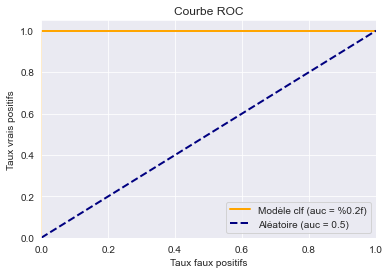

In [36]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, seuils = roc_curve(y_reg_test, probs[:,1], pos_label=1)

auc(fpr, tpr)

plt.plot(fpr, tpr, color='orange',
         lw=2, label='Modèle clf (auc = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

Etant  l'accuracy  à  1 et  notre echantillon  avec deux classes  distinctes ,  nous avons  une  ligne droite  parfaite. Ceci pour  montrer  la  performance  de  notre  modele qui  predit extraordinairement  bien  .

# Algorithme de  prediction 

Avec  un  set  de  test  , nous allons concevoir  un  programme qui  permet  d'indiquer  l'authenticité d'un billet  en  mettant  le seuil  à 0.5.
Pour  y arriver  ,  nous allons  nous  assurer 
-que  notre set d'apprentissage a  les  memes dimensions que  le  set de  test 
-Ensuite  , nous ferons  une  prediction  pour voir si  notre algorithme  modelise  bien  selon  les  parametres  choisis  

In [50]:
#Importons  le set  de test 
dftest= pd.read_csv('test_notes.csv')
dftest.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


In [52]:
dfV = dftest.drop(columns= ['id'])
dfV
#Nous supprimons  la colonne  id qui  ne  nous sert pas  à grande chose  

,diagonal,height_left,height_right,margin_low,margin_up,length
0,172.09,103.95,103.73,4.39,3.09,113.19
1,171.52,104.17,104.03,5.27,3.16,111.82
2,171.78,103.80,103.75,3.81,3.24,113.39
3,172.02,104.08,103.99,5.57,3.30,111.10
4,171.79,104.34,104.37,5.00,3.07,111.87


###Application  de  la  probabilité  sur  le set  de test 

In [56]:
proba = model.predict_proba(dfV)

In [61]:
proba

array([[0.04633827, 0.95366173],
       [0.92781875, 0.07218125],
       [0.00715322, 0.99284678],
       [0.99407462, 0.00592538],
       [0.89649134, 0.10350866]])

## application  de  l'algorithme 

In [57]:
y_test_pred = np.where(proba[:,1]>0.5,1,0)
#Creation  de  y de  prediction 

In [58]:
y_test_pred
#Affichage des  probabilités  d'authenticité 

array([1, 0, 1, 0, 0])

##Jonction  de  la colonne  proba  au  set  initial  de test 

In [59]:
dftest['proba'] = y_test_pred.tolist()
#Creation d'une colonne proba en  liste  qui  affiche  les  predictions  

In [60]:
dftest

,diagonal,height_left,height_right,margin_low,margin_up,length,id,proba
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1,1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2,0
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3,1
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4,0
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5,0


In [62]:
dftest['is_genuine'] = y_test_pred.tolist()
#affectation de  la variable  d'authenticité à la variable de  prediction  

In [63]:
dftest['proba'] = proba[:,1].tolist()
#on  modifie la colonne  proba en recuperant  les valeurs  du modele de  prediction  et  precisement  la deuxieme colonne  qui  indique 
# la qualité Vrai des  billets  .

In [64]:
dftest

,diagonal,height_left,height_right,margin_low,margin_up,length,id,proba,is_genuine
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1,0.953662,1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2,0.072181,0
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3,0.992847,1
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4,0.005925,0
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5,0.103509,0


In [ ]:
##Le  process  pour  tester  notre algorithme  
1.importation  du fichier de  test 
2.Pre-processing sur  le set 
    dimensionnement (suppression 'id')
3.Application  du model  de   probalité
    Avec  la  fonction  créée
    Creation de  variable  y_test
    Recuperer  la  liste 
4. de colonne proba avec  less resultats  predits de  y 
5.Jonction  de cette  colonne  au  set  initial 
6.ajout de  la variable  illustrative  avec  les valeurs  de  la variable  predite 
7.Modification de  la colonne  proba  avec  la fonction créée en ne gardant que  la 2 ieme colonne  de vrai  du  billet  

# Conclusion

Avec  le  big data  et les nouvelles technologies de  sciences de données ,  il peut  y avoir des avancées  dans la  lutte contre les faussaires de  monnaie  qui  plombent  l'economie.  